In [ ]:
import sys
sys.path.append('..')
import config
from experiments.cross_val import run_cv_experiment
from utils.io_utils import plot_history, plot_tuning_results
import matplotlib.pyplot as plt
from loaders.eeg_loader import load_eeg_dataset
from sklearn.model_selection import StratifiedKFold
from augmentations import get_augmentation
import numpy as np
import matplotlib.pyplot as plt
from loaders.eeg_loader import load_eeg_dataset
from main import run_experiment

augmentations = ["Non_Augmented", "ChannelsDropout", "FTSurrogate", "TimeReverse", "SmoothTimeMask"]
results = {}

In [2]:
X, y, groups, n_classes = load_eeg_dataset(mode="single", subject_id=1)
groups_for_cv = groups['trial_ids'] 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [3]:
history, mean_acc = run_cv_experiment(
    X, y, groups_for_cv, n_classes, cv, 
    exp_name="FTSurrogate", 
    aug_params=config.AUG_PARAMS, 
    hyperparams=config.HYPERPARAMS,
    verbose=False 
)

c:\Users\Lova\.conda\envs\IS_env\lib\site-packages\sklearn\model_selection\_split.py:883: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


 -> Fold 1 Finished. Best Val Acc: 18.75%


KeyboardInterrupt: 

In [4]:
for aug in augmentations:
    method = aug
    print(f"Running experiment with augmentation: {method}")

    history, mean_acc = run_cv_experiment(
        X, y, groups_for_cv, n_classes, cv, 
        exp_name=method, 
        aug_params=config.AUG_PARAMS, 
        hyperparams=config.HYPERPARAMS,
        verbose=False 
    )
    results[method] = {
        'history': history,
        'accuracy': mean_acc
    }


Running experiment with augmentation: Non_Augmented
--- DATA DEBUG (Fold 1) ---


c:\Users\Lova\.conda\envs\IS_env\lib\site-packages\sklearn\model_selection\_split.py:883: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


X_tr_raw Mean: -0.0000, Std: 0.9907
X_tr_raw Max: 5.3172, Min: -6.5694
Class distribution: {np.int64(0): np.int64(32), np.int64(1): np.int64(32), np.int64(2): np.int64(32), np.int64(3): np.int64(32), np.int64(4): np.int64(32), np.int64(5): np.int64(32), np.int64(6): np.int64(32), np.int64(7): np.int64(32)}
---------------------------
Initial Grad Norm: 5.192630
 -> Fold 1 Finished. Best Val Acc: 15.62%
Initial Grad Norm: 5.040943
 -> Fold 2 Finished. Best Val Acc: 15.62%
Initial Grad Norm: 5.135914
 -> Fold 3 Finished. Best Val Acc: 17.19%
Initial Grad Norm: 4.946801


KeyboardInterrupt: 

In [ ]:

for method, res in results.items():
    print(f"{method}: Accuracy = {res['accuracy']:.4f}")


LEAKAGE & GROWTH AUDIT: Non_Augmented
FOLD 1:
  - LEAKAGE CHECK:     PASSED (Isolated)
  - Raw Train Size:    160
  - Final Train Size:  160 (1.0x)
  - Validation Size:   160
  - CONTENT MODIFIED:  FAILED (Dataset did not grow)
----------------------------------------


c:\Users\Lova\.conda\envs\IS_env\lib\site-packages\sklearn\model_selection\_split.py:883: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


FOLD 2:
  - LEAKAGE CHECK:     PASSED (Isolated)
  - Raw Train Size:    160
  - Final Train Size:  160 (1.0x)
  - Validation Size:   160
  - CONTENT MODIFIED:  FAILED (Dataset did not grow)
----------------------------------------

LEAKAGE & GROWTH AUDIT: ChannelsDropout


c:\Users\Lova\.conda\envs\IS_env\lib\site-packages\sklearn\model_selection\_split.py:883: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


FOLD 1:
  - LEAKAGE CHECK:     PASSED (Isolated)
  - Raw Train Size:    160
  - Final Train Size:  320 (2.0x)
  - Validation Size:   160
  - CONTENT MODIFIED:  Yes (Success)
----------------------------------------
FOLD 2:
  - LEAKAGE CHECK:     PASSED (Isolated)
  - Raw Train Size:    160
  - Final Train Size:  320 (2.0x)
  - Validation Size:   160
  - CONTENT MODIFIED:  Yes (Success)
----------------------------------------

LEAKAGE & GROWTH AUDIT: FTSurrogate


c:\Users\Lova\.conda\envs\IS_env\lib\site-packages\sklearn\model_selection\_split.py:883: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


FOLD 1:
  - LEAKAGE CHECK:     PASSED (Isolated)
  - Raw Train Size:    160
  - Final Train Size:  320 (2.0x)
  - Validation Size:   160
  - CONTENT MODIFIED:  Yes (Success)
----------------------------------------
FOLD 2:
  - LEAKAGE CHECK:     PASSED (Isolated)
  - Raw Train Size:    160
  - Final Train Size:  320 (2.0x)
  - Validation Size:   160
  - CONTENT MODIFIED:  Yes (Success)
----------------------------------------

LEAKAGE & GROWTH AUDIT: TimeReverse


c:\Users\Lova\.conda\envs\IS_env\lib\site-packages\sklearn\model_selection\_split.py:883: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


FOLD 1:
  - LEAKAGE CHECK:     PASSED (Isolated)
  - Raw Train Size:    160
  - Final Train Size:  320 (2.0x)
  - Validation Size:   160
  - CONTENT MODIFIED:  Yes (Success)
----------------------------------------
FOLD 2:
  - LEAKAGE CHECK:     PASSED (Isolated)
  - Raw Train Size:    160
  - Final Train Size:  320 (2.0x)
  - Validation Size:   160
  - CONTENT MODIFIED:  Yes (Success)
----------------------------------------

LEAKAGE & GROWTH AUDIT: SmoothTimeMask


c:\Users\Lova\.conda\envs\IS_env\lib\site-packages\sklearn\model_selection\_split.py:883: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


FOLD 1:
  - LEAKAGE CHECK:     PASSED (Isolated)
  - Raw Train Size:    160
  - Final Train Size:  320 (2.0x)
  - Validation Size:   160
  - CONTENT MODIFIED:  Yes (Success)
----------------------------------------
FOLD 2:
  - LEAKAGE CHECK:     PASSED (Isolated)
  - Raw Train Size:    160
  - Final Train Size:  320 (2.0x)
  - Validation Size:   160
  - CONTENT MODIFIED:  Yes (Success)
----------------------------------------


In [ ]:
X, y, groups, n_classes = load_eeg_dataset(mode="single", subject_id=1)
groups_for_cv = groups['trial_ids'] # This should be length 320

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for aug in augmentations:
    method = aug
    print(f"Running experiment with augmentation: {method}")

    history, mean_acc = run_cv_experiment(
        X, y, groups_for_cv, n_classes, cv, 
        exp_name=method, 
        aug_params=config.AUG_PARAMS, 
        hyperparams=config.HYPERPARAMS,
        verbose=False 
    )
    results[method] = {
        'history': history,
        'accuracy': mean_acc
    }


In [ ]:

for method, res in results.items():
    print(f"{method}: Accuracy = {res['accuracy']:.4f}")

In [ ]:

for exp_name in experiments:
    print(f"\n>>> Running Experiment: {exp_name}")
    
    
    
    history, mean_acc = run_experiment(exp_name, mode="single", subject_id=1)
    
    results[exp_name] = {
        "history": history,
        "score": mean_acc
    }
    
print("\nAll experiments completed.")


>>> Running Experiment: Non_Augmented

--- Starting: Non_Augmented | Mode: single | Sub: 1 ---


c:\Users\Lova\.conda\envs\IS_env\lib\site-packages\sklearn\model_selection\_split.py:883: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(



>>> Starting Fold 1 | Log: d:\OneDrive - Luleå University of Technology\År 5\EX\IS_bimodal\runs\Non_Augmented\Fold_1
[Non_Augmented F1] Ep 01 | TL: 2.1450 VL: 2.0873 | TA: 12.50% VA: 4.69%
[Non_Augmented F1] Ep 02 | TL: 2.1256 VL: 2.0875 | TA: 11.72% VA: 4.69%
[Non_Augmented F1] Ep 03 | TL: 2.0944 VL: 2.0877 | TA: 14.84% VA: 4.69%
[Non_Augmented F1] Ep 04 | TL: 2.0742 VL: 2.0879 | TA: 17.58% VA: 6.25%
[Non_Augmented F1] Ep 05 | TL: 2.0705 VL: 2.0881 | TA: 18.36% VA: 6.25%
[Non_Augmented F1] Ep 06 | TL: 2.0569 VL: 2.0884 | TA: 18.75% VA: 4.69%
[Non_Augmented F1] Ep 07 | TL: 2.0405 VL: 2.0888 | TA: 18.75% VA: 4.69%
[Non_Augmented F1] Ep 08 | TL: 2.0369 VL: 2.0891 | TA: 20.31% VA: 4.69%
[Non_Augmented F1] Ep 09 | TL: 2.0258 VL: 2.0895 | TA: 21.88% VA: 6.25%
[Non_Augmented F1] Ep 10 | TL: 2.0020 VL: 2.0901 | TA: 25.78% VA: 4.69%
[Non_Augmented F1] Ep 11 | TL: 2.0039 VL: 2.0906 | TA: 21.48% VA: 4.69%
[Non_Augmented F1] Ep 12 | TL: 1.9786 VL: 2.0910 | TA: 26.17% VA: 4.69%
[Non_Augmented F1]

c:\Users\Lova\.conda\envs\IS_env\lib\site-packages\sklearn\model_selection\_split.py:883: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(



>>> Starting Fold 1 | Log: d:\OneDrive - Luleå University of Technology\År 5\EX\IS_bimodal\runs\ChannelsDropout\Fold_1
[ChannelsDropout F1] Ep 01 | TL: 2.1244 VL: 2.0720 | TA: 12.89% VA: 18.75%
[ChannelsDropout F1] Ep 02 | TL: 2.1088 VL: 2.0706 | TA: 12.30% VA: 17.19%
[ChannelsDropout F1] Ep 03 | TL: 2.0769 VL: 2.0688 | TA: 15.82% VA: 17.19%
[ChannelsDropout F1] Ep 04 | TL: 2.0515 VL: 2.0670 | TA: 15.62% VA: 17.19%
[ChannelsDropout F1] Ep 05 | TL: 2.0453 VL: 2.0651 | TA: 19.14% VA: 23.44%
[ChannelsDropout F1] Ep 06 | TL: 2.0049 VL: 2.0629 | TA: 21.48% VA: 21.88%
[ChannelsDropout F1] Ep 07 | TL: 1.9959 VL: 2.0605 | TA: 21.88% VA: 21.88%
[ChannelsDropout F1] Ep 08 | TL: 1.9764 VL: 2.0577 | TA: 23.44% VA: 21.88%
[ChannelsDropout F1] Ep 09 | TL: 1.9467 VL: 2.0548 | TA: 28.32% VA: 21.88%
[ChannelsDropout F1] Ep 10 | TL: 1.9285 VL: 2.0521 | TA: 27.54% VA: 21.88%
[ChannelsDropout F1] Ep 11 | TL: 1.9146 VL: 2.0492 | TA: 28.91% VA: 20.31%
[ChannelsDropout F1] Ep 12 | TL: 1.9009 VL: 2.0462 | TA

c:\Users\Lova\.conda\envs\IS_env\lib\site-packages\sklearn\model_selection\_split.py:883: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(



>>> Starting Fold 1 | Log: d:\OneDrive - Luleå University of Technology\År 5\EX\IS_bimodal\runs\FTSurrogate\Fold_1
[FTSurrogate F1] Ep 01 | TL: 2.1008 VL: 2.0767 | TA: 11.72% VA: 21.88%
[FTSurrogate F1] Ep 02 | TL: 2.0740 VL: 2.0765 | TA: 13.87% VA: 18.75%
[FTSurrogate F1] Ep 03 | TL: 2.0860 VL: 2.0763 | TA: 16.60% VA: 17.19%
[FTSurrogate F1] Ep 04 | TL: 2.0724 VL: 2.0762 | TA: 16.60% VA: 15.62%
[FTSurrogate F1] Ep 05 | TL: 2.0541 VL: 2.0760 | TA: 18.55% VA: 20.31%
[FTSurrogate F1] Ep 06 | TL: 2.0543 VL: 2.0754 | TA: 18.75% VA: 17.19%
[FTSurrogate F1] Ep 07 | TL: 2.0380 VL: 2.0752 | TA: 18.55% VA: 15.62%
[FTSurrogate F1] Ep 08 | TL: 2.0243 VL: 2.0750 | TA: 18.55% VA: 17.19%
[FTSurrogate F1] Ep 09 | TL: 2.0154 VL: 2.0751 | TA: 24.80% VA: 15.62%
[FTSurrogate F1] Ep 10 | TL: 2.0030 VL: 2.0751 | TA: 23.24% VA: 18.75%
[FTSurrogate F1] Ep 11 | TL: 1.9975 VL: 2.0748 | TA: 25.98% VA: 17.19%
[FTSurrogate F1] Ep 12 | TL: 1.9927 VL: 2.0752 | TA: 25.98% VA: 15.62%
[FTSurrogate F1] Ep 13 | TL: 1.9

c:\Users\Lova\.conda\envs\IS_env\lib\site-packages\sklearn\model_selection\_split.py:883: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(



>>> Starting Fold 1 | Log: d:\OneDrive - Luleå University of Technology\År 5\EX\IS_bimodal\runs\TimeReverse\Fold_1
[TimeReverse F1] Ep 01 | TL: 2.1747 VL: 2.0722 | TA: 12.11% VA: 23.44%
[TimeReverse F1] Ep 02 | TL: 2.1518 VL: 2.0702 | TA: 13.48% VA: 23.44%
[TimeReverse F1] Ep 03 | TL: 2.1298 VL: 2.0679 | TA: 13.09% VA: 21.88%
[TimeReverse F1] Ep 04 | TL: 2.0762 VL: 2.0653 | TA: 18.95% VA: 20.31%
[TimeReverse F1] Ep 05 | TL: 2.0737 VL: 2.0627 | TA: 17.19% VA: 18.75%
[TimeReverse F1] Ep 06 | TL: 2.0646 VL: 2.0601 | TA: 19.53% VA: 23.44%
[TimeReverse F1] Ep 07 | TL: 2.0215 VL: 2.0575 | TA: 18.95% VA: 21.88%
[TimeReverse F1] Ep 08 | TL: 2.0135 VL: 2.0540 | TA: 21.68% VA: 18.75%
[TimeReverse F1] Ep 09 | TL: 2.0106 VL: 2.0507 | TA: 21.29% VA: 17.19%
[TimeReverse F1] Ep 10 | TL: 1.9884 VL: 2.0477 | TA: 22.66% VA: 15.62%
[TimeReverse F1] Ep 11 | TL: 1.9825 VL: 2.0448 | TA: 24.02% VA: 15.62%
[TimeReverse F1] Ep 12 | TL: 1.9720 VL: 2.0414 | TA: 26.56% VA: 17.19%
[TimeReverse F1] Ep 13 | TL: 1.9

c:\Users\Lova\.conda\envs\IS_env\lib\site-packages\sklearn\model_selection\_split.py:883: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(



>>> Starting Fold 1 | Log: d:\OneDrive - Luleå University of Technology\År 5\EX\IS_bimodal\runs\SmoothTimeMask\Fold_1
[SmoothTimeMask F1] Ep 01 | TL: 2.1300 VL: 2.0863 | TA: 12.30% VA: 9.38%
[SmoothTimeMask F1] Ep 02 | TL: 2.1030 VL: 2.0860 | TA: 15.43% VA: 10.94%
[SmoothTimeMask F1] Ep 03 | TL: 2.0681 VL: 2.0855 | TA: 18.36% VA: 14.06%
[SmoothTimeMask F1] Ep 04 | TL: 2.0471 VL: 2.0850 | TA: 17.97% VA: 14.06%
[SmoothTimeMask F1] Ep 05 | TL: 2.0222 VL: 2.0844 | TA: 20.70% VA: 17.19%
[SmoothTimeMask F1] Ep 06 | TL: 2.0004 VL: 2.0831 | TA: 24.61% VA: 15.62%
[SmoothTimeMask F1] Ep 07 | TL: 1.9725 VL: 2.0817 | TA: 29.30% VA: 18.75%
[SmoothTimeMask F1] Ep 08 | TL: 1.9376 VL: 2.0806 | TA: 31.45% VA: 17.19%
[SmoothTimeMask F1] Ep 09 | TL: 1.9300 VL: 2.0790 | TA: 32.81% VA: 17.19%
[SmoothTimeMask F1] Ep 10 | TL: 1.9033 VL: 2.0767 | TA: 34.57% VA: 17.19%
[SmoothTimeMask F1] Ep 11 | TL: 1.8785 VL: 2.0747 | TA: 36.91% VA: 17.19%
[SmoothTimeMask F1] Ep 12 | TL: 1.8546 VL: 2.0724 | TA: 40.43% VA: 1

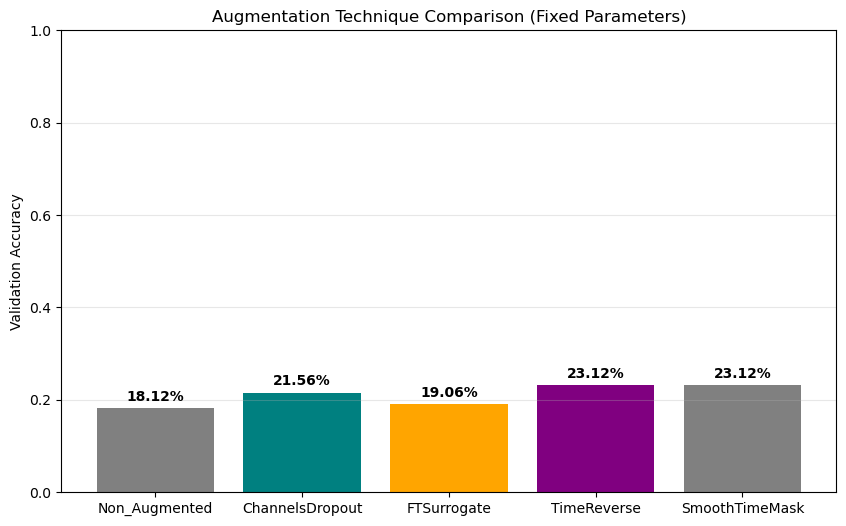

In [ ]:
# Extract scores
names = list(results.keys())
scores = [results[n]["score"] for n in names]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(names, scores, color=['gray', 'teal', 'orange', 'purple'])

# Styling
plt.ylim(0, 1.0)
plt.ylabel("Validation Accuracy")
plt.title("Augmentation Technique Comparison (Fixed Parameters)")
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontweight='bold')

plt.show()

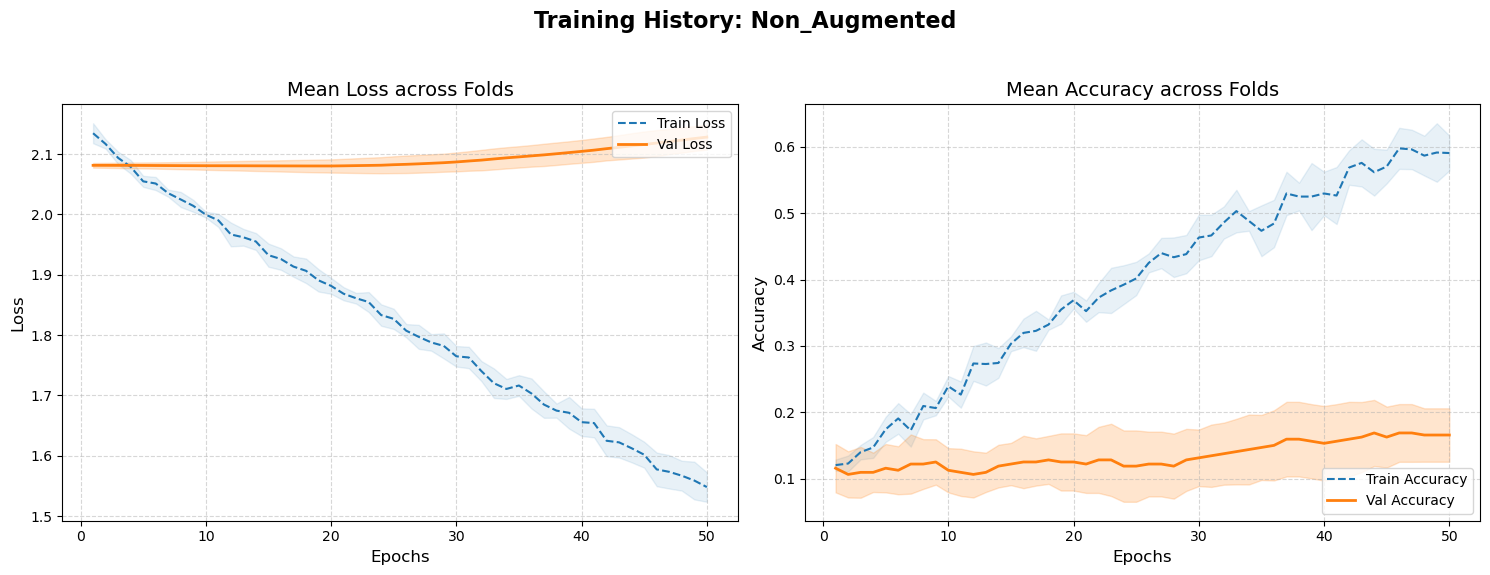

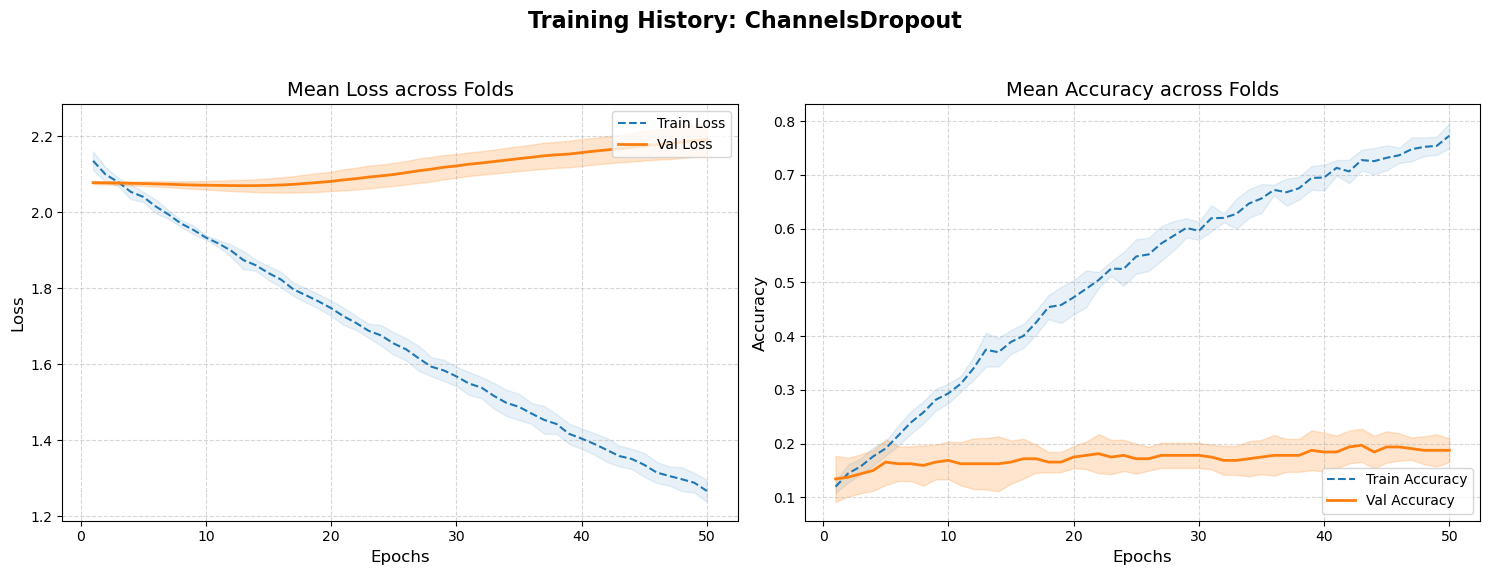

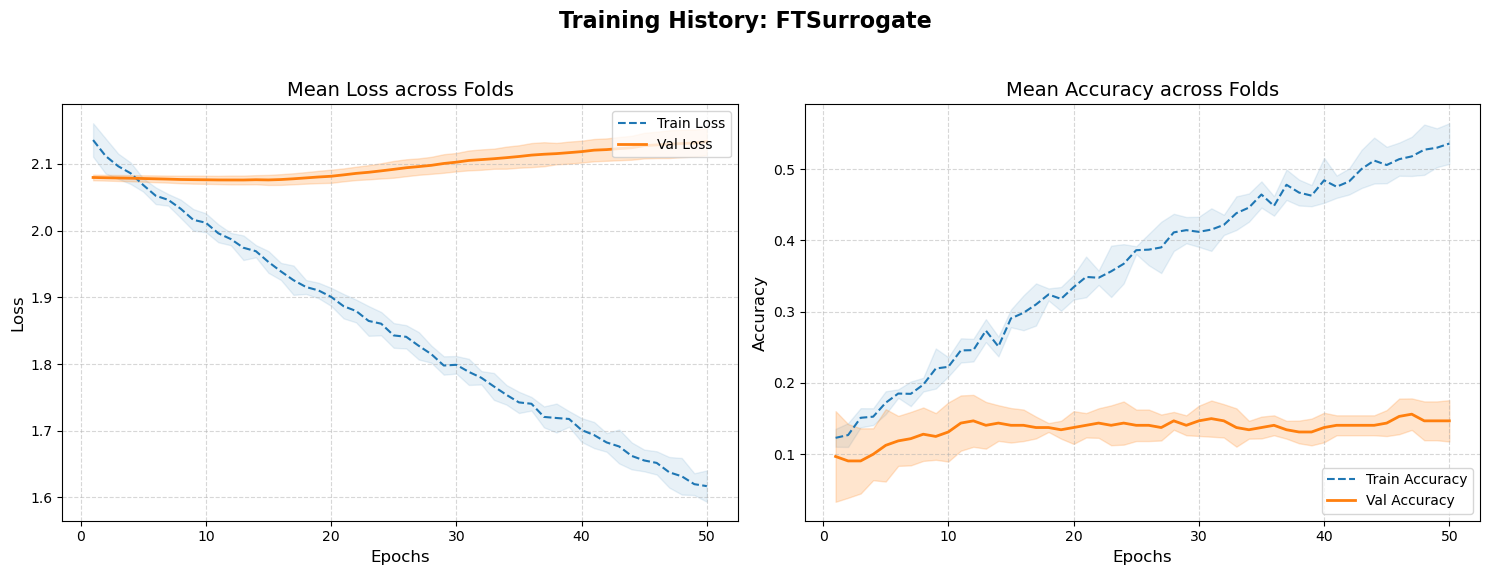

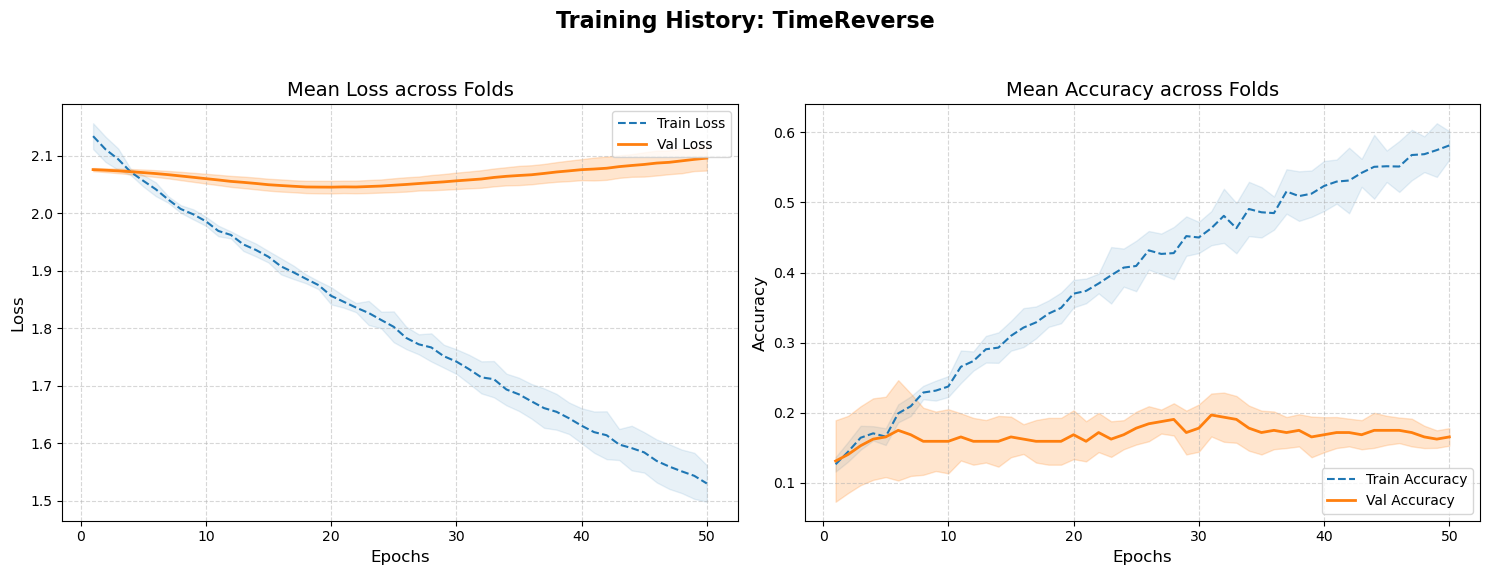

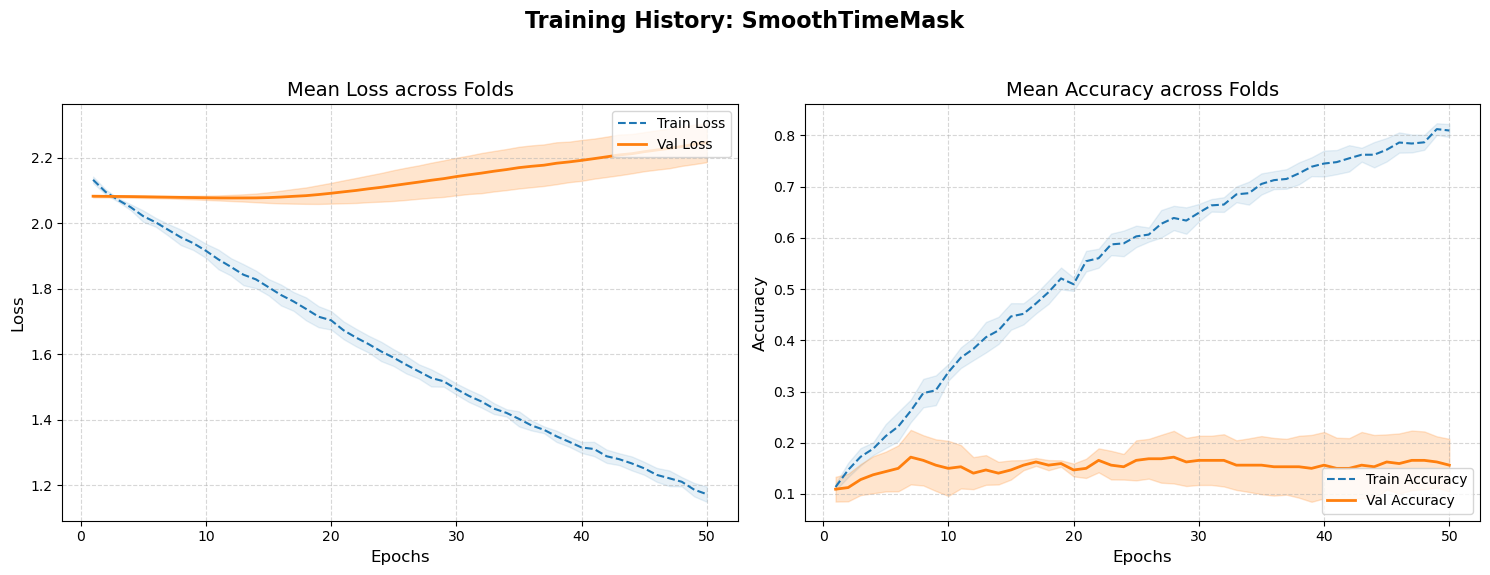

In [ ]:
for exp_name in results:
    plot_history(results[exp_name]["history"], title=f"Training History: {exp_name}")
    